# Import Libraries

In [1]:
import pandas as pd
import datetime
import numpy as np
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import ArcGIS
from sklearn.svm import SVR


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

jap = pd.read_csv('jap_data_clean.csv') # japam Earthquake Data
tur = pd.read_csv('tur_data_clean.csv') # Turkey Earthquake Data


# first lets pre-process the data which we will be using.

In [2]:
jap['time'] = pd.to_datetime(jap['time'])
# change time column into datetime value

# create hour, minute, second variables from datetime
jap['hour'] = jap['time'].dt.hour
jap['minute'] = jap['time'].dt.minute
jap['second'] = jap['time'].dt.second


# sort the fataframe by time
jap = jap.sort_values('time')

### We will create a new column for seasons. This column will be used for Linear Regression Model 2 to compare if added seasons can affect our prediction.

In [3]:
seasons = []
#create empty list

months = jap['month'].tolist()

# add number according to Month
# Winter = 1, Spring = 2, Summer = 3, Autumn = 4
for i in months:
    if i == 1:
        x = 1
        seasons.append(x)
    elif i == 2:
        x = 1
        seasons.append(x)
    elif i == 3:
        x = 2
        seasons.append(x)
    elif i == 4:
        x = 2
        seasons.append(x)
    elif i == 5:
        x = 2
        seasons.append(x)
    elif i == 6:
        x = 3
        seasons.append(x)
    elif i == 7:
        x = 3
        seasons.append(x)
    elif i == 8:
        x = 3
        seasons.append(x)
    elif i == 9:
        x = 4
        seasons.append(x)
    elif i == 10:
        x = 4
        seasons.append(x)
    elif i == 11:
        x = 4
        seasons.append(x)
    else:
        x = 1
        seasons.append(x)
        
# add seasons to the dataframe       
jap['season'] = seasons

# Linear Regression (Time Series)

## Model 1 (without Seasons):

In [4]:
X1 = jap[['latitude', 'longitude', 'depth', 'day', 'month', 'year', 'hour', 'minute', 'second']]
y1 = jap['mag']
# create X and y variables


# training size is kept 0.8 for our work
train_size = 0.8
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=train_size, random_state=42)


# first make sure the values are standardized
scaler = StandardScaler()

# We only need to standardize the X values (train and test both)
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)


# create model and pass values through
lr_model1 = LinearRegression()
lr_model1.fit(X1_train_scaled, y1_train)

# Now we will make the predictions on our testing data
y_pred_lr1 = lr_model1.predict(X1_test_scaled)

#create metrics to analyise results
# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y1_test, y_pred_lr1)
print('Mean Square Error is: ', mse)


# Root Mean Squared Error (RMSE)
rmse_lr = mean_squared_error(y1_test, y_pred_lr1, squared=False)
print('Root Mean Squared Error (Linear Regression):', rmse_lr)


# Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y1_test, y_pred_lr1)
print('Mean Absolute Error is: ', mae)


# R-squared
r2 = metrics.r2_score(y1_test, y_pred_lr1)
print('R-Squared is: ', r2)

Mean Square Error is:  0.21798511093053785
Root Mean Squared Error (Linear Regression): 0.46688875648331674
Mean Absolute Error is:  0.33406436291316544
R-Squared is:  0.0444458660181829


## Visualize Model 1:

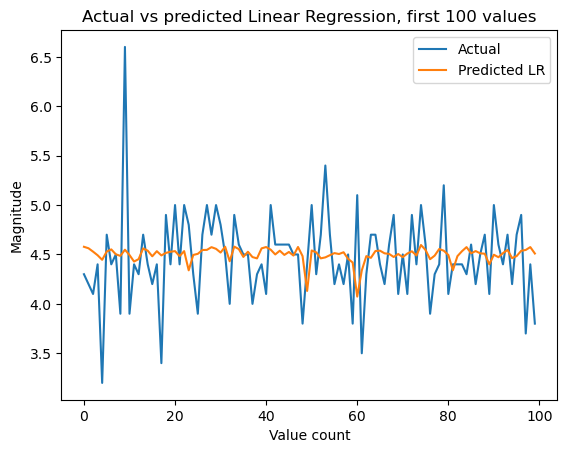

In [13]:
# Create variables for forst 100 values so its easy to see graph
pred_100 = y_pred_lr1[:100]
test_100 = y1_test[:100]

# Create a dataframe with the predicted and actual mag values, we used the first 100 values only
df_pred = pd.DataFrame({'Actual mag': test_100, 'Predicted mag': pred_100})

# Reset the index to make it easier to plot
df_pred = df_pred.reset_index(drop=True)

# Plot the actual and predicted mag values
plt.plot(df_pred['Actual mag'], label='Actual')
plt.plot(df_pred['Predicted mag'], label='Predicted LR')
plt.title('Actual vs predicted Linear Regression, first 100 values')
plt.xlabel('Value count')
plt.ylabel('Magnitude')
plt.legend()
plt.savefig('Actual vs predicted Linear Regression, first 100 values')
plt.show()


## Model 2 (With Seasons):

In [7]:
# Define input and target variables
X2 = jap[['latitude', 'longitude', 'depth','year', 'month', 'day', 'hour', 'minute', 'second', 'season']]
y2 = jap['mag']

train_size = 0.8
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=train_size, random_state=42)


scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)


# Create a linear regression model and fit it to the training data
lr_model2 = LinearRegression()
lr_model2.fit(X2_train_scaled, y2_train)

# Make predictions on the testing data
y_pred_lr2 = lr_model2.predict(X2_test_scaled)

# Mean Squared Error (MSE)
mse2 = metrics.mean_squared_error(y2_test, y_pred_lr2)
print('Mean Square Error with season is: ', mse2)


# Root Mean Squared Error (RMSE)
rmse_lr2 = mean_squared_error(y2_test, y_pred_lr2, squared=False)
print('Root Mean Squared Error (Linear Regression) with season is:', rmse_lr2)


# Mean Absolute Error (MAE)
mae2 = metrics.mean_absolute_error(y2_test, y_pred_lr2)
print('Mean Absolute Erroswith season is: ', mae2)


# R-squared
r2b = metrics.r2_score(y2_test, y_pred_lr2)
print('R-Squared with season is: ', r2b)

Mean Square Error with season is:  0.2180105921248608
Root Mean Squared Error (Linear Regression) with season is: 0.4669160439788515
Mean Absolute Erroswith season is:  0.33410744224569644
R-Squared with season is:  0.04433416728577799


## Model 2 (with Seasons):

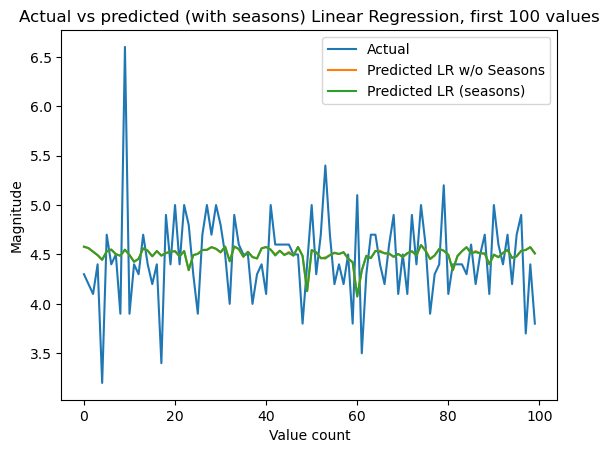

In [14]:
# Create variables for forst 100 values so its easy to see graph
pred_100_2 = y_pred_lr2[:100]
test_100_2 = y2_test[:100]

# Create a dataframe with the predicted and actual mag values
df_pred_2 = pd.DataFrame({'Actual mag': test_100_2, 'Predicted mag': pred_100_2})

# Reset the index to make it easier to plot
df_pred_2 = df_pred_2.reset_index(drop=True)

# Plot the actual and predicted mag values
plt.plot(df_pred_2['Actual mag'], label='Actual')
plt.plot(df_pred['Predicted mag'], label='Predicted LR w/o Seasons')
plt.plot(df_pred_2['Predicted mag'], label='Predicted LR (seasons)')
plt.title('Actual vs predicted (with seasons) Linear Regression, first 100 values')
plt.xlabel('Value count')
plt.ylabel('Magnitude')
plt.legend()
plt.savefig('Actual vs predicted (with seasons) Linear Regression, first 100 values')
plt.show()


# SVR

## SVR model 3 Without Seasons

In [9]:
X3 = jap[['latitude', 'longitude', 'depth', 'day', 'month', 'year', 'hour', 'minute', 'second']]
y3 = jap['mag']


X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.8, random_state=42)


scaler3 = StandardScaler()
X_train_scaled = scaler.fit_transform(X3_train)
X_test_scaled = scaler.transform(X3_test)


svr_model3 = SVR()
svr_model3.fit(X_train_scaled, y3_train)

y_pred_svr = svr_model3.predict(X_test_scaled)


# Mean Squared Error (MSE)
mse2 = metrics.mean_squared_error(y3_test, y_pred_svr)
print('Mean Square Error with season is: ', mse2)


# Root Mean Squared Error (RMSE)
rmse_lr2 = mean_squared_error(y3_test, y_pred_svr, squared=False)
print('Root Mean Squared Error (SVR) is:', rmse_lr2)


# Mean Absolute Error (MAE)
mae2 = metrics.mean_absolute_error(y3_test, y_pred_svr)
print('Mean Absolute Erroswith season is: ', mae2)


# R-squared
r2b = metrics.r2_score(y3_test, y_pred_svr)
print('R-Squared with season is: ', r2b)

Mean Square Error with season is:  0.21305065040186905
Root Mean Squared Error (SVR) is: 0.4615741006619295
Mean Absolute Erroswith season is:  0.3280279546020564
R-Squared with season is:  0.056452280422944145


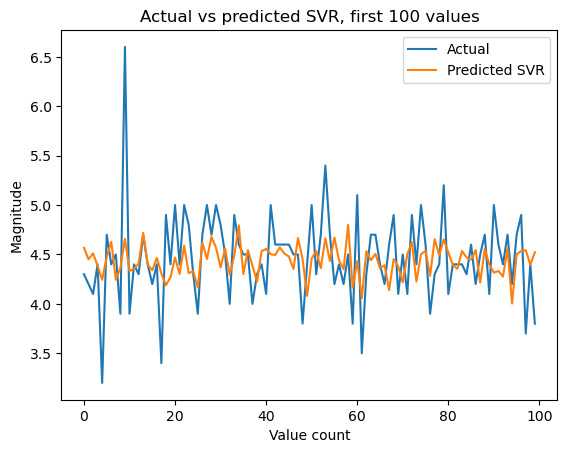

In [17]:
# Create variables for forst 100 values so its easy to see graph
preds = y_pred_svr[:100]
tests = y3_test[:100]

# Create a dataframe with the predicted and actual mag values
df_svr = pd.DataFrame({'Actual mag': tests, 'Predicted mag': preds})

# Reset the index to make it easier to plot
df_svr = df_svr.reset_index(drop=True)

# Plot the actual and predicted mag values
plt.plot(df_svr['Actual mag'], label='Actual')
plt.plot(df_svr['Predicted mag'], label='Predicted SVR')
plt.title('Actual vs predicted SVR, first 100 values')
plt.xlabel('Value count')
plt.ylabel('Magnitude')
plt.legend()
plt.savefig('Actual vs predicted Support Vector Regression, first 100 values')
plt.show()


## SVR model With Seasons

In [11]:
X4 = jap[['latitude', 'longitude', 'depth', 'day', 'month', 'year', 'hour', 'minute', 'second', 'season']]
y4 = jap['mag']


X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.8, random_state=42)


scaler4 = StandardScaler()
X_train_scaled = scaler4.fit_transform(X4_train)
X_test_scaled = scaler4.transform(X4_test)


svr_model4 = SVR()
svr_model4.fit(X_train_scaled, y4_train)

y_pred_svr4 = svr_model4.predict(X_test_scaled)


# Mean Squared Error (MSE)
mse2 = metrics.mean_squared_error(y4_test, y_pred_svr4)
print('Mean Square Error with season is: ', mse2)


# Root Mean Squared Error (RMSE)
rmse_lr2 = mean_squared_error(y4_test, y_pred_svr4, squared=False)
print('Root Mean Squared Error (SVR) is:', rmse_lr2)


# Mean Absolute Error (MAE)
mae2 = metrics.mean_absolute_error(y4_test, y_pred_svr4)
print('Mean Absolute Erroswith season is: ', mae2)


# R-squared
r2b = metrics.r2_score(y4_test, y_pred_svr4)
print('R-Squared with season is: ', r2b)

Mean Square Error with season is:  0.21400295281470924
Root Mean Squared Error (SVR) is: 0.4626045317706142
Mean Absolute Erroswith season is:  0.32941633375732415
R-Squared with season is:  0.05223477266932686


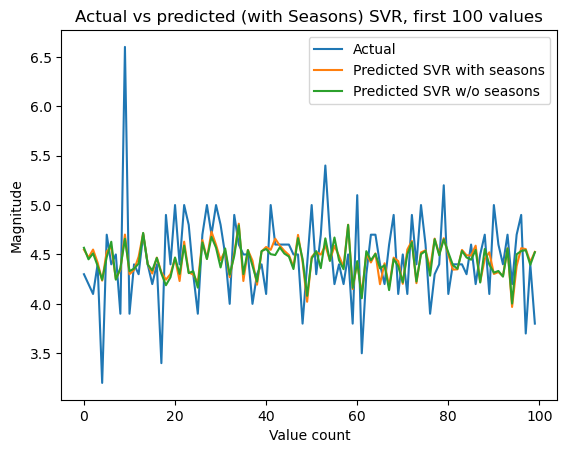

In [16]:
# Create variables for forst 100 values so its easy to see graph
preds2 = y_pred_svr4[:100]
tests2 = y4_test[:100]

# Create a dataframe with the predicted and actual mag values
df_svr4 = pd.DataFrame({'Actual mag': tests2, 'Predicted mag': preds2})

# Reset the index to make it easier to plot
df_svr4 = df_svr4.reset_index(drop=True)

# Plot the actual and predicted mag values
plt.plot(df_svr4['Actual mag'], label='Actual')
plt.plot(df_svr4['Predicted mag'], label='Predicted SVR with seasons')
plt.plot(df_svr['Predicted mag'], label='Predicted SVR w/o seasons')
plt.title('Actual vs predicted (with Seasons) SVR, first 100 values')
plt.xlabel('Value count')
plt.ylabel('Magnitude')
plt.legend()
plt.savefig('Actual vs predicted (with Seasons) Support Vector Regression, first 100 values')
plt.show()
